## Notebook 1: Exploring City Bikes API

#### Section 1: Importing Libraries

In [1]:
# Importing necessary libraries for API requests, data handling, and visualization
import requests
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import seaborn as sns
from requests.exceptions import HTTPError, RequestException

#### Section 2: Defining Classes for Bike Stations and Networks

In [2]:
# Define a BikeStation class to represent each station
class BikeStation:
    def __init__(self, name, latitude, longitude, slots):
        self.name = name
        self.latitude = latitude
        self.longitude = longitude
        self.slots = slots

    def to_dict(self):
        return {
            "bike_station_name": self.name,
            "bike_station_latitude": self.latitude,
            "bike_station_longitude": self.longitude,
            "number_of_bikes": self.slots
        }

    def __repr__(self):
        return f"BikeStation({self.name}, {self.latitude}, {self.longitude}, {self.slots})"

# Define a BikeNetwork class to manage all stations
class BikeNetwork:
    def __init__(self, network_id):
        self.network_id = network_id
        self.stations = []

    def fetch_data(self):
        """Fetches data from the CityBikes API and stores bike stations."""
        url = f"http://api.citybik.es/v2/networks/{self.network_id}"
        
        # Error handling for API requests
        try:
            response = requests.get(url)
            response.raise_for_status()  # Raise an HTTPError for bad responses

            data = response.json()
            self.stations = [
                BikeStation(
                    station['name'],
                    station['latitude'],
                    station['longitude'],
                    station['extra']['slots']
                )
                for station in data['network']['stations']
            ]
        except HTTPError as http_err:
            print(f"HTTP error occurred: {http_err}")
        except RequestException as req_err:
            print(f"Error occurred: {req_err}")
        except ValueError as json_err:
            print(f"JSON decoding error: {json_err}, Response content: {response.text}")

    def to_dataframe(self):
        """Converts the bike stations to a Pandas DataFrame."""
        return pd.DataFrame([station.to_dict() for station in self.stations])

    def save_to_csv(self, filename):
        """Saves the bike stations to a CSV file."""
        df = self.to_dataframe()
        df.to_csv(filename, index=False)

    def visualize(self):
        """Creates an initial visualization of bike stations."""
        df = self.to_dataframe()
        df.plot(kind='scatter', x='bike_station_longitude', y='bike_station_latitude', alpha=0.5, s=100)
        plt.title('Bike Stations')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.show()

#### Section 3: Fetching and Displaying Data

In [3]:
# Example usage
network_id = "baksi-bisim"  # Network ID for Izmir, Turkey
bike_network = BikeNetwork(network_id)
bike_network.fetch_data()

# Display the first few stations
pprint(bike_network.stations[:5])

[BikeStation(Buz Pisti 1, 38.468382, 27.211666, 20),
 BikeStation(Pasaport İskele, 38.4275173482, 27.1325844103, 20),
 BikeStation(Yunuslar, 38.4511789658, 27.1041118947, 12),
 BikeStation(Vasıf Çınar, 38.4303211039, 27.1342384751, 20),
 BikeStation(Göztepe Köprü, 38.3992000613, 27.0837509082, 30)]


#### Section 4: Data Exploration

In [4]:
# Convert parsed data into a DataFrame and save to CSV
bike_stations_df = bike_network.to_dataframe()
bike_network.save_to_csv('bike_stations.csv')

# Exploring the data
print("\nData Overview:")
print(bike_stations_df.head())  # Display the first few rows
print("\nData Info:")
print(bike_stations_df.info())  # Data types and missing values check
print("\nSummary Statistics:")
print(bike_stations_df.describe())  # Summary statistics for numerical columns


Data Overview:
  bike_station_name  bike_station_latitude  bike_station_longitude  \
0       Buz Pisti 1              38.468382               27.211666   
1   Pasaport İskele              38.427517               27.132584   
2          Yunuslar              38.451179               27.104112   
3       Vasıf Çınar              38.430321               27.134238   
4     Göztepe Köprü              38.399200               27.083751   

   number_of_bikes  
0               20  
1               20  
2               12  
3               20  
4               30  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   bike_station_name       46 non-null     object 
 1   bike_station_latitude   46 non-null     float64
 2   bike_station_longitude  46 non-null     float64
 3   number_of_bikes         46 non-null     int64  
dtype

#### Section 5: Outlier Detection

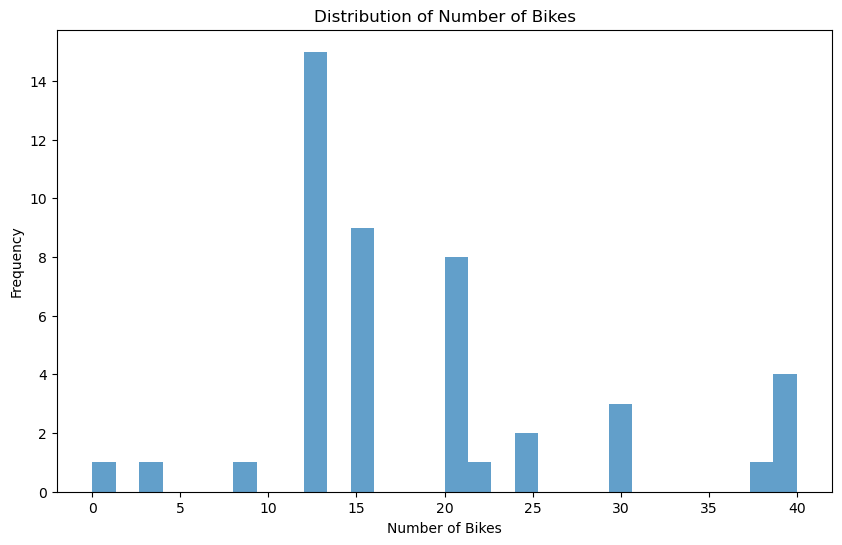

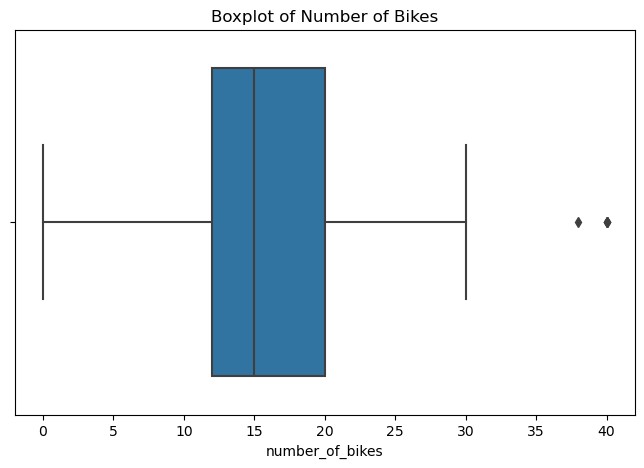

In [5]:
# Visualize distribution of 'number_of_bikes' to detect potential outliers
plt.figure(figsize=(10, 6))
plt.hist(bike_stations_df['number_of_bikes'], bins=30, alpha=0.7)
plt.title('Distribution of Number of Bikes')
plt.xlabel('Number of Bikes')
plt.ylabel('Frequency')
plt.show()

# Boxplot for outlier detection
plt.figure(figsize=(8, 5))
sns.boxplot(x=bike_stations_df['number_of_bikes'])
plt.title('Boxplot of Number of Bikes')
plt.show()

#### Section 6: Data Cleaning

In [6]:
# Check for missing or zero values in the 'number_of_bikes' column
print("\nMissing Values per Column:\n", bike_stations_df.isnull().sum())

# Filter out rows with invalid data (e.g., number_of_bikes == 0)
bike_stations_df = bike_stations_df[bike_stations_df['number_of_bikes'] > 0]

# Recheck the dataframe after filtering
print("\nData Overview After Cleaning:")
print(bike_stations_df.info())


Missing Values per Column:
 bike_station_name         0
bike_station_latitude     0
bike_station_longitude    0
number_of_bikes           0
dtype: int64

Data Overview After Cleaning:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 45
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   bike_station_name       45 non-null     object 
 1   bike_station_latitude   45 non-null     float64
 2   bike_station_longitude  45 non-null     float64
 3   number_of_bikes         45 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 1.8+ KB
None


#### Section 7: Enhanced Visualization

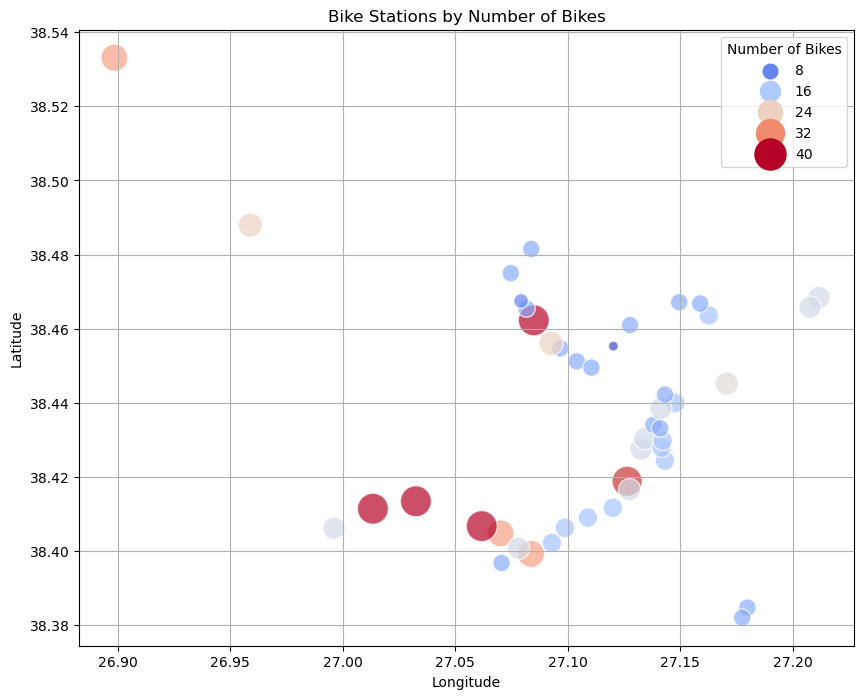

In [7]:
# Enhanced scatter plot for visualizing bike stations based on the number of bikes
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=bike_stations_df,
    x='bike_station_longitude',
    y='bike_station_latitude',
    size='number_of_bikes',
    sizes=(50, 500),
    hue='number_of_bikes',
    alpha=0.7,
    palette='coolwarm'
)
plt.title('Bike Stations by Number of Bikes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Number of Bikes')
plt.grid(True)
plt.show()